In [6]:
from sklearn.datasets import fetch_california_housing
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

In [7]:
housing = fetch_california_housing(as_frame = True)

In [12]:
train_data, test_data = train_test_split(housing.frame, test_size=0.2, random_state=42)
target = "AveRooms"

In [13]:
X_train = train_data.drop(target, axis=1)
y_train = train_data[target]

X_test = test_data.drop(target, axis=1)
y_test = test_data[target]

X_train_simple = X_train[['MedInc']]
X_test_simple = X_test[['MedInc']]

model = LinearRegression().fit(X_train_simple, y_train)

y_pred = model.predict(X_test_simple)

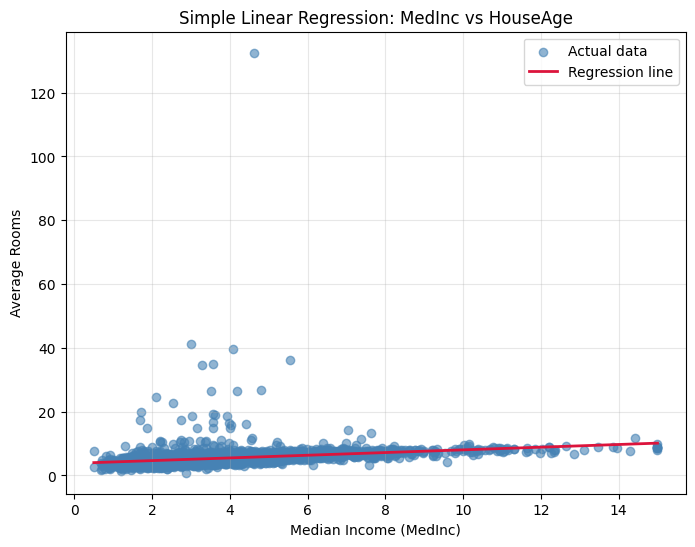

In [16]:
x_values = X_test_simple['MedInc'].values 
y_values = y_test.values

order = np.argsort(x_values)

plt.figure(figsize=(8, 6))
plt.scatter(x_values, y_values, color="steelblue", alpha=0.6, label="Actual data")
plt.plot(x_values[order], y_pred[order], color="crimson", linewidth=2, label="Regression line")
plt.title("Simple Linear Regression: MedInc vs HouseAge")
plt.xlabel("Median Income (MedInc)")
plt.ylabel("Average Rooms")
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

In [17]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"MSE: {mse:.3f}")
print(f"R² Score: {r2:.3f}")

MSE: 7.113
R² Score: 0.089
